# Arbitary Value Imputation
It consists of replacing a NaN value with an arbitary value.
This technique was derived form Kaggle competition.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv('titanic.csv',usecols=['Survived','Age','Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
def impute_anan(df,variable):
    df[variable+'_hundred'] = df[variable].fillna(100)
    df[variable+'_zero'] = df[variable].fillna(0)

<AxesSubplot:>

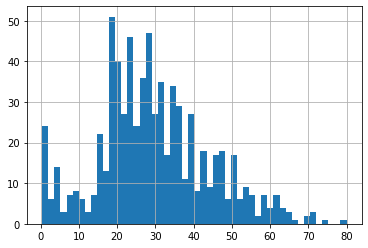

In [30]:
df['Age'].hist(bins=50)

In [31]:
impute_anan(df,'Age')

# Handling Missing values in Categorical Variables
Frequent Category Imputation

In [32]:
cdf = pd.read_csv('loan.csv',usecols=['BsmtQual','SalePrice','FireplaceQu','GarageType'])
cdf.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [33]:
cdf.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [34]:
cdf.isnull().mean().sort_values(ascending=True)


SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

# Computing the Frequency of every Feature 

<AxesSubplot:>

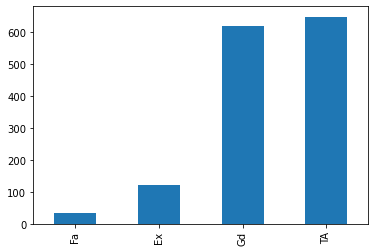

In [35]:
cdf['BsmtQual'].value_counts().sort_values(ascending=True).plot.bar()

<AxesSubplot:>

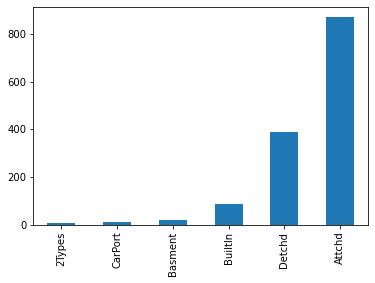

In [36]:
cdf['GarageType'].value_counts().sort_values(ascending=True).plot.bar()

In [37]:
cdf['GarageType'].mode()[0]

'Attchd'

# Replacing the Null values with most frequent category

In [38]:
def impute_freq_nan(df,variable):
    most_frequen_category = df[variable].value_counts().index[0]##df['variable'].mode()[0]
    df[variable].fillna(most_frequen_category,inplace=True)

In [39]:
for features in ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice']:
    impute_freq_nan(cdf,features)

In [40]:
cdf.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

# ##Advantages 
1. Easy to implement
2. Faster way to implement
####Disadvantages
1. It distorts the relation of the most frequent labels

# 2. Adding a variable to capture NAN

In [41]:
df = pd.read_csv('loan.csv',usecols=['BsmtQual','SalePrice','FireplaceQu','GarageType'])
df.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [46]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [47]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [50]:
frequent = df['BsmtQual'].mode()[0]

In [51]:
frequent

'TA'

In [52]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [53]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [54]:
df['FireplaceQu_var'] = np.where(df['FireplaceQu'].isnull(),1,0)
frequent = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [56]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


# Suppose if you have more frequent categories, we just replace NANs with new category.

In [57]:

fdf = pd.read_csv('loan.csv',usecols=['BsmtQual','SalePrice','FireplaceQu','GarageType'])
fdf.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'], dtype='object')

In [58]:
def impute_new_feature(df,variable):
    df[variable+'_newvar'] = np.where(df[variable].isnull(),'Missing',df[variable])

In [59]:
for f in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_new_feature(fdf,f)

In [60]:
fdf.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [63]:
for f in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    fdf = fdf.drop(f,axis=1)

In [64]:
fdf.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
